In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import base64
import csv
import os
import seaborn as sns
import numpy as np
from glob import glob
from shutil import copyfile

%matplotlib inline

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('dataset/recipes_df10-23-2017.csv', error_bad_lines=False, encoding='utf-8', sep = '\t')

In [3]:
len(set(df.recipe_id))
df.shape

(308562, 425)

In [4]:
df = df.dropna(axis=0, how='any')
df = df.drop_duplicates(subset = 'recipe_id')
# query recipes that were added less than 1 month
df = df.query('date_x < "2017-09-02"')

In [5]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [6]:
df['printed_total'] = np.exp(df['printed_per_day'])*df['days_exists']
df['printed_daily'] = df['printed_total']/df['days_exists']
df['log_printed_per_day'] = df['printed_per_day']

In [7]:
ing_cols = [col for col in df.columns if '_ing' in col]
tag_cols = [col for col in df.columns if '_tag' in col]
all_cols = df.columns.values.tolist()
rest_cols = set(all_cols) - set(ing_cols) - set(tag_cols)
#rest_cols

In [8]:
df_with_pics = df[df.has_picture == 'yes'].copy()

In [9]:
len(tag_cols)

167

In [10]:
id_v = 'recipe_id'
dv   = 'printed_per_day'

In [11]:
df_with_pics[[id_v, dv]].head()

,recipe_id,printed_per_day
2,recipe-3333651495007708,-1.533930
5,recipe-3333561494972170,-1.698233
11,recipe-3321081493152882,-1.159237
17,recipe-3205721477169720,-1.889821
19,recipe-3336321495482842,-0.739978


In [12]:
df_with_pics = df_with_pics.drop_duplicates(subset=[id_v, dv])

In [13]:
print(len(df_with_pics.recipe_id))
print(len(set(df_with_pics.recipe_id)))

182231
182231


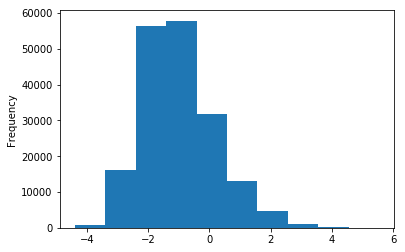

In [14]:
df_with_pics[dv].plot.hist()

In [15]:
df_with_pics['label'] = (df_with_pics[dv] >= df_with_pics[dv].quantile(q=0.5)).astype(str)
df_with_pics['label'].head()

2     False
5     False
11    False
17    False
19     True
Name: label, dtype: object

In [16]:
df_with_pics['new_name'] =  df_with_pics['label'] + '.' + df_with_pics['recipe_id'] + '.jpg'

In [17]:
df_with_pics.head()

,recipe_id,difficulty,date_x,has_picture,num_reviews,avg_rating,stars,prep_time,printed_total,printed_last_month,saved_total,saved_last_month,author_registered,author_posts,days_exists,author_reg,printed_per_day,saved_per_day,posts_per_day,Amaretto_ing,Ananas_ing,Apfel_ing,Apfelsaft_ing,Aprikose_ing,Aubergine_ing,Außerdem:_ing,Avocado_ing,Backpulver_ing,Bacon_ing,Balsamico_ing,Banane_ing,Bandnudeln_ing,Basilikum_ing,Birne_ing,Blattspinat_ing,Blumenkohl_ing,Blätterteig_ing,Bohnen_ing,Brokkoli_ing,Brötchen_ing,Brühe_ing,Butter_ing,Butter_oder_Margarine_ing,Buttermilch_ing,Butterschmalz_ing,Cayennepfeffer_ing,Champignons_ing,Chiliflocken_ing,Chilipulver_ing,Chilischote_ing,...,Shake_tag,Silvester_tag,Skandinavien_tag,Snack_tag,Sommer_tag,Spanien_tag,Studentenküche_tag,Suppe_tag,Südafrika_tag,Süßspeise_tag,Tarte_tag,Thailand_tag,Torte_tag,Trennkost_tag,Tschechien_tag,Türkei_tag,USA_oder_Kanada_tag,Ungarn_tag,Vegan_tag,Vegetarisch_tag,Vietnam_tag,Vollwert_tag,Vorspeise_tag,Weihnachten_tag,Weißrussland_tag,Wild_tag,Wildgeflügel_tag,Winter_tag,Wok_tag,Wursten_tag,alkoholfrei_tag,cross-cooking_tag,einfach_tag,fettarm_tag,gebunden_tag,gekocht_tag,kalorienarm_tag,kalt_tag,klar_tag,marinieren_tag,raffiniert_oder_preiswert_tag,spezial_tag,warm_tag,Ägypten_tag,Österreich_tag,Überbacken_tag,printed_daily,log_printed_per_day,label,new_name
2,recipe-3333651495007708,normal,2017-05-23,yes,1.0,3.00,3,45.0,33.0,0.0,0.0,0.0,2010-02-17,0.0,153,2805,-1.533930,-inf,-inf,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.215686,-1.533930,False,False.recipe-3333651495007708.jpg
5,recipe-3333561494972170,normal,2017-05-23,yes,1.0,3.00,3,25.0,28.0,0.0,1.0,0.0,2017-05-16,0.0,153,160,-1.698233,-5.030438,-inf,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.183007,-1.698233,False,False.recipe-3333561494972170.jpg
11,recipe-3321081493152882,simpel,2017-05-23,yes,0.0,2.50,unb,10.0,48.0,2.0,0.0,0.0,2016-12-14,0.0,153,313,-1.159237,-inf,-inf,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.313725,-1.159237,False,False.recipe-3321081493152882.jpg
17,recipe-3205721477169720,normal,2016-10-24,yes,0.0,2.50,unb,30.0,55.0,2.0,2.0,0.0,2013-06-02,0.0,364,1604,-1.889821,-5.204007,-inf,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.151099,-1.889821,False,False.recipe-3205721477169720.jpg
19,recipe-3336321495482842,simpel,2017-05-23,yes,1.0,3.33,3_5,15.0,73.0,2.0,8.0,0.0,2014-10-05,518.0,153,1114,-0.739978,-2.950996,-0.765737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.477124,-0.739978,True,True.recipe-3336321495482842.jpg


In [18]:
np.exp(df[dv].quantile(q=0.5))

0.17522724870774797

In [19]:
np.exp(df_with_pics[dv].quantile(q=0.5))

0.31863354037267089

In [54]:
df_with_pics[['recipe_id', 'new_name']].to_csv('dataset/new_names.csv', sep = '\t', index=False)

# Save pictures into folders with category in their names

In [ ]:
# rename search_pics to classification_with_pics2

In [20]:
os.getcwd()

'/home/ubuntu/Extracting-food-preferences'

In [5]:
#current_dir = os.getcwd()
#PROJECT_DIR = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences'
PROJECT_DIR  = '/home/ubuntu/Extracting-food-preferences'
PICTURES_DIR = '/home/ubuntu/Extracting-food-preferences/classification_with_pics'

In [22]:
%cd $PROJECT_DIR
#%mkdir classification_with_pics2
%mkdir classification_with_pics\train
%mkdir classification_with_pics\valid
%mkdir classification_with_pics\sample
%mkdir classification_with_pics\results
%mkdir classification_with_pics\sample\train
%mkdir classification_with_pics\sample\valid
%mkdir classification_with_pics\sample\results

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences


In [23]:
%cd $PICTURES_DIR
#%mkdir classification_with_pics2
%mkdir train
%mkdir valid
%mkdir sample
%mkdir results
%mkdir sample/train
%mkdir sample/valid
%mkdir sample/results

/home/ubuntu/Extracting-food-preferences/classification_with_pics


In [28]:
# Set pics folder as a working diretory
%cd $PICTURES_DIR/train

/home/ubuntu/Extracting-food-preferences/classification_with_pics/train


In [29]:
g = glob('*.jpg')
g[:5]

['True.recipe-2384331377801007.jpg',
 'False.recipe-1917611312470439.jpg',
 'False.recipe-863241191860465.jpg',
 'True.recipe-1079821213690175.jpg',
 'False.recipe-95991037885733.jpg']

In [42]:
# rename files back
#for i in range(len(g)): os.rename(g[i], 
#                                 PICTURES_DIR + '/'
#                                 + g[i].split('.')[1] +'.jpg')

In [27]:
# made a renamed copy of pictures
# remove images without labels
nl = (set(g) - set(df_with_pics[id_v]+'.jpg'))
g = list(set(g) - set(nl))
for i in range(len(g)): os.rename(g[i], 
                                 PICTURES_DIR
                                 + "/train/" 
                                 + df_with_pics[df_with_pics[id_v]+'.jpg' == g[i]]['new_name'].item())

KeyboardInterrupt: 

In [169]:
# Set train data folder as a working diretory
%cd $PICTURES_DIR\train\

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\train


In [170]:
# move 30k pictures from training set to validation set
g = glob('*.jpg')
shuf = np.random.permutation(g)
#for i in range(30000): os.rename(shuf[i]
for i in range(4): os.rename(shuf[i], 
                             PICTURES_DIR
                             + "\\valid\\"
                             + shuf[i])

In [171]:
# copy 200 images to sample set for experimentation
g = glob('*.jpg')
shuf = np.random.permutation(g)
#for i in range(200): copyfile(shuf[i], 
for i in range(5): copyfile(shuf[i],
                            PICTURES_DIR
                            +'\\sample\\train\\'
                            + shuf[i])

In [172]:
# Set validation data folder as a working diretory
%cd $PICTURES_DIR\valid\

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\valid


In [173]:
# copy 50 images from validation set to sample validation
g = glob('*.jpg')
shuf = np.random.permutation(g)
#for i in range(50): copyfile(shuf[i], 
for i in range(2): copyfile(shuf[i], 
                            PICTURES_DIR
                            +'\\sample\\valid\\' 
                            + shuf[i])

# Rearrange image files into their respective directories

In [41]:
#CLASSIFICATION_DIR = PROJECT_DIR +'\\classification_with_pics2'

In [174]:
#Divide cat/dog images into separate directories
%cd $PICTURES_DIR/sample/train
%mkdir popular
%mkdir unpopular
!move True.*.jpg popular/
!move False.*.jpg unpopular/

%cd $PICTURES_DIR/sample/valid
%mkdir popular
%mkdir unpopular
!move True.*.jpg popular/
!move False.*.jpg unpopular/

%cd $PICTURES_DIR/valid
%mkdir popular
%mkdir unpopular
!move True.*.jpg popular/
!move False.*.jpg unpopular/

%cd $PICTURES_DIR/train
%mkdir popular
%mkdir unpopular
!move True.*.jpg popular/
!move False.*.jpg unpopular/

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\train
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\train\True.recipe-13972907778.jpg
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\train\True.recipe-19972999410.jpg
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\train\True.recipe-30974460077.jpg
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\train\True.recipe-32974461094.jpg
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\train\True.recipe-34974726152.jpg
        5 file(s) moved.
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\valid


A duplicate file name exists, or the file
cannot be found.


C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\valid\True.recipe-28974106789.jpg
        1 file(s) moved.
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\sample\valid\False.recipe-36974792563.jpg
        1 file(s) moved.
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\valid
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\valid\True.recipe-28974106789.jpg
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\valid\True.recipe-6971800010.jpg
        2 file(s) moved.
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\valid\False.recipe-12972895612.jpg
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics2\valid\False.recipe-36974792563.jpg
        2 file(s) moved.
C:\Users\Natalia\Documents\GitHub\Extracting-food-preferen

# Finetune the VGG

In [3]:
os.getcwd()

'/home/ubuntu/Extracting-food-preferences'

In [8]:
%cd $PROJECT_DIR

/home/ubuntu/Extracting-food-preferences


In [ ]:
#import modules
from utils import *
from vgg16 import Vgg16
from datetime import datetime

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

In [65]:
#current_dir = os.getcwd()
#PROJECT_DIR = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences'
#CLASSIFICATION_DIR = PROJECT_DIR +'\\classification_with_pics'

In [46]:
%cd $PICTURES_DIR

#Set path to sample/ path if desired
path = PICTURES_DIR #+ '/sample'
#path = PICTURES_DIR + '\\' + 'sample\\'
results_path=path + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

/home/ubuntu/Extracting-food-preferences/classification_with_pics


In [13]:
#import Vgg16 helper class
vgg = Vgg16()

In [50]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=50
no_of_epochs=1

In [51]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.1

Found 153087 images belonging to 2 classes.
Found 30000 images belonging to 2 classes.


In [52]:
start = datetime.now()
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: {}".format(epoch))
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft{}.h5'.format(epoch)
    vgg.model.save_weights(results_path+latest_weights_filename)
print("Completed {} fit operations".format(no_of_epochs))
end = datetime.now()
total = end - start
print('Time to run the script on GPU is {}'.format(total))

Running epoch: 0
Epoch 1/1
153087/153087 [==============================] - 3752s - loss: 8.0533 - acc: 0.5002 - val_loss: 8.0800 - val_acc: 0.4987
Completed 1 fit operations
Time to run the script on GPU is 1:02:40.434522


In [21]:
h=vgg.fit2(batches, val_batches, nb_epoch=5)

AttributeError: Vgg16 instance has no attribute 'fit2'

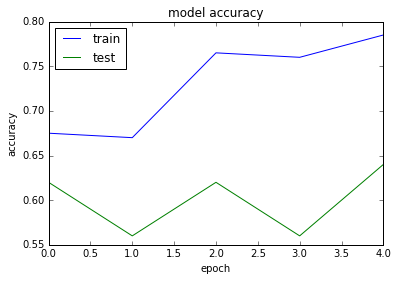

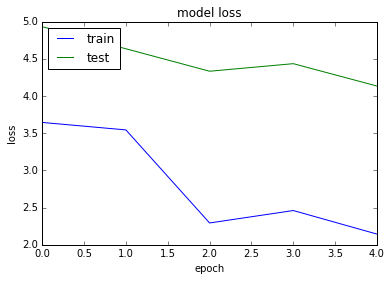

In [140]:
# summarize history for accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [35]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [36]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 30 correct labels


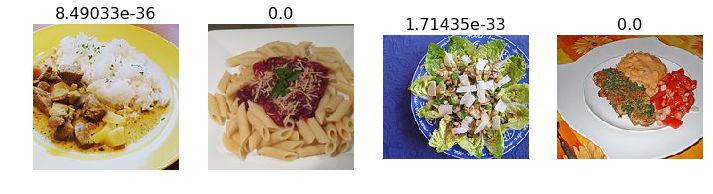

In [37]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print("Found {} correct labels".format(len(correct)))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 20 incorrect labels


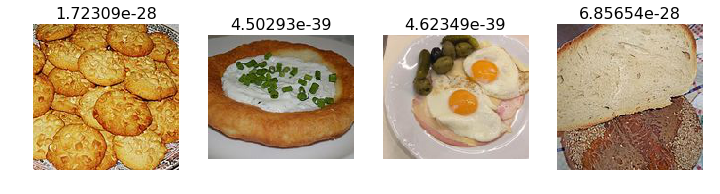

In [38]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print("Found {} incorrect labels".format(len(incorrect)))
#print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

In [39]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
#print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

IndexError: list index out of range

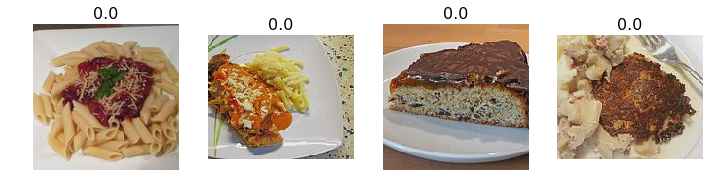

In [40]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
#print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

In [41]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
#print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

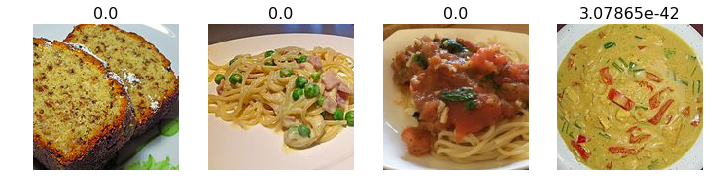

In [42]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
#print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

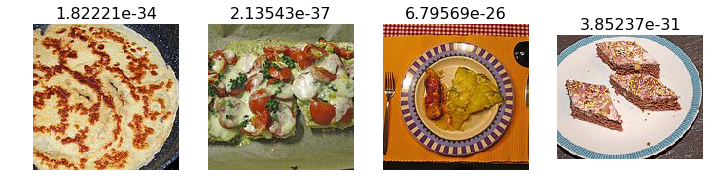

In [43]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[ 0 20]
 [ 0 30]]


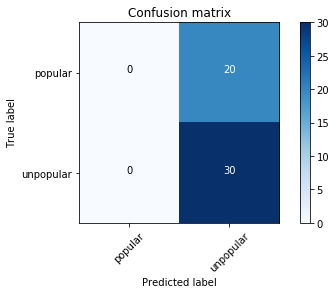

In [45]:
plot_confusion_matrix(cm, val_batches.class_indices)